In [140]:
#Importing essential Dependencies

import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import model_from_json
import pandas as pd

In [141]:
#Capturing dataframe

my_data = pd.read_csv("/root/Downloads/musk_csv.csv")


In [142]:
#Splitting the data into 80:20 ratio for training and testing datasets

from sklearn.model_selection import train_test_split
x = my_data.iloc[:,3:169]
y = my_data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20 )
print('Train:', len(x_train), 'test:', len(x_test))

Train: 5278 test: 1320


In [143]:
#Normalizing the training and testing datasets 

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() #Using Sequential model 
model.add(tf.keras.layers.Flatten()) #Input layer of the neural network
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #Another layer of 128 neurons
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) #Another layer of 128 neurons
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax)) #Last layer or output layer having 2 neurons

model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'] ) #Compiling the model
history = model.fit(x_train.values, y_train.values, epochs = 10, validation_split=0.25, batch_size=16, verbose=1) #Training the model

Train on 3958 samples, validate on 1320 samples
Epoch 1/10
3958/3958 [==============================] - 2s 561us/sample - loss: 0.2920 - accuracy: 0.8861 - val_loss: 0.1966 - val_accuracy: 0.9159
Epoch 2/10
3958/3958 [==============================] - 2s 424us/sample - loss: 0.1554 - accuracy: 0.9419 - val_loss: 0.1320 - val_accuracy: 0.9568
Epoch 3/10
3958/3958 [==============================] - 2s 443us/sample - loss: 0.1135 - accuracy: 0.9596 - val_loss: 0.1048 - val_accuracy: 0.9644
Epoch 4/10
3958/3958 [==============================] - 2s 445us/sample - loss: 0.0884 - accuracy: 0.9669 - val_loss: 0.1226 - val_accuracy: 0.9508
Epoch 5/10
3958/3958 [==============================] - 2s 394us/sample - loss: 0.0790 - accuracy: 0.9687 - val_loss: 0.0766 - val_accuracy: 0.9689
Epoch 6/10
3958/3958 [==============================] - 2s 438us/sample - loss: 0.0617 - accuracy: 0.9765 - val_loss: 0.1021 - val_accuracy: 0.9682
Epoch 7/10
3958/3958 [==============================] - 2s 424us

In [144]:
#Evaluating the model accuracy and model loss

val_loss, val_accuracy = model.evaluate(x_test.values,y_test.values)
print(val_loss, val_accuracy)

1320/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

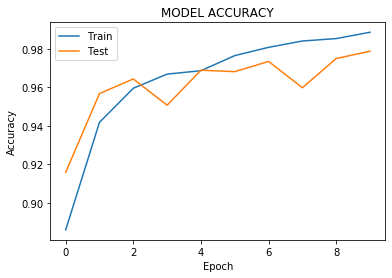

In [145]:
#Plotting the model accuracy curve for training and testing datasets

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MODEL ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

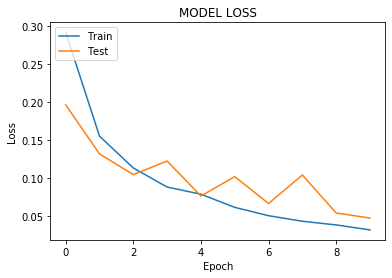

In [146]:
#Plotting the model loss curve for training and testing datasets

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MODEL LOSS')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [147]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk
